Use the famous Iris flower dataset from sklearn.datasets to build a random forest model.

In [83]:
#import all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [84]:
#load the data by importing it from sklearn since it is an in-built dataset
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [85]:
#Create a pandas dataframe using the iris dataset
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [86]:
#Append or add the target column to the dataframe (iris_data)
iris_data['target'] = iris.target
iris_data.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [98]:
#split the dataset into train and test set.
x = iris_data.drop(['target'], axis = 'columns') #independent variables
y = iris_data['target'] #dependent variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [99]:
#create class object and train the dataset
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [101]:
#Measure the accuracy of the model
model.score(x_test, y_test)

0.9333333333333333

## Confusion Matrix

In [103]:
y_predicted = model.predict(x_test)
y_predicted

array([1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0,
       0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       2, 2, 1, 2, 1, 2, 2, 0, 2])

In [104]:
iris_data_cm = confusion_matrix(y_test, y_predicted)
iris_data_cm

array([[29,  0,  0],
       [ 0, 17,  2],
       [ 0,  3, 24]], dtype=int64)

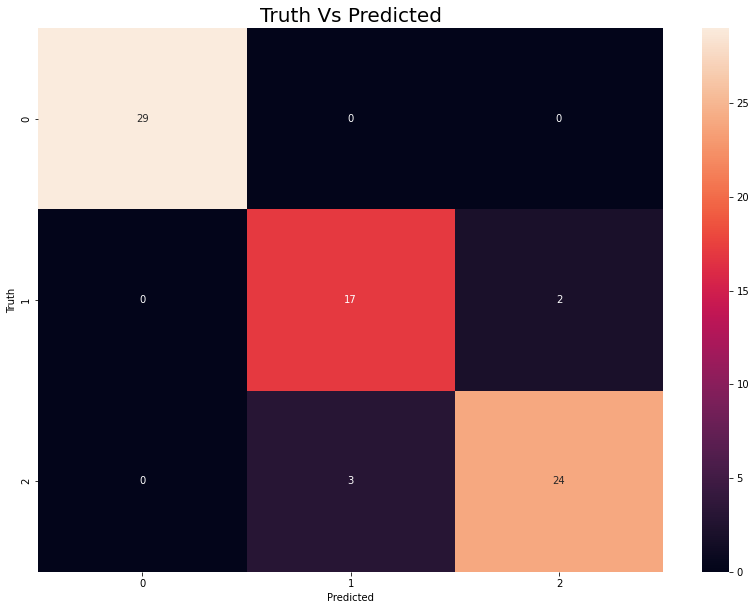

In [109]:
#plot a Confusion Matrix to see the distribution of errors(right vs wrong performance)
figure = plt.figure(figsize = (14, 10))
title = plt.title('Truth Vs Predicted', color = 'black', fontsize = 20)
sns.heatmap(iris_data_cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

This matrix means that there are 29 zeros(0) and 29 times the model predicted zero(0). Therefore, zero(0) performed really well.
The two(2) means that two(2) times the truth is one(1), but the model predicted it to be two(2) which is an error. And seveteen(17) times the truth is one(1) and the model predicted it to be one(1).
Also, three(3) times, the truth is two(2) but the model predicted it to be one(1) which is another error, and twenty-four(24) times the truth is two(2) and the model predicted it to be two(2).